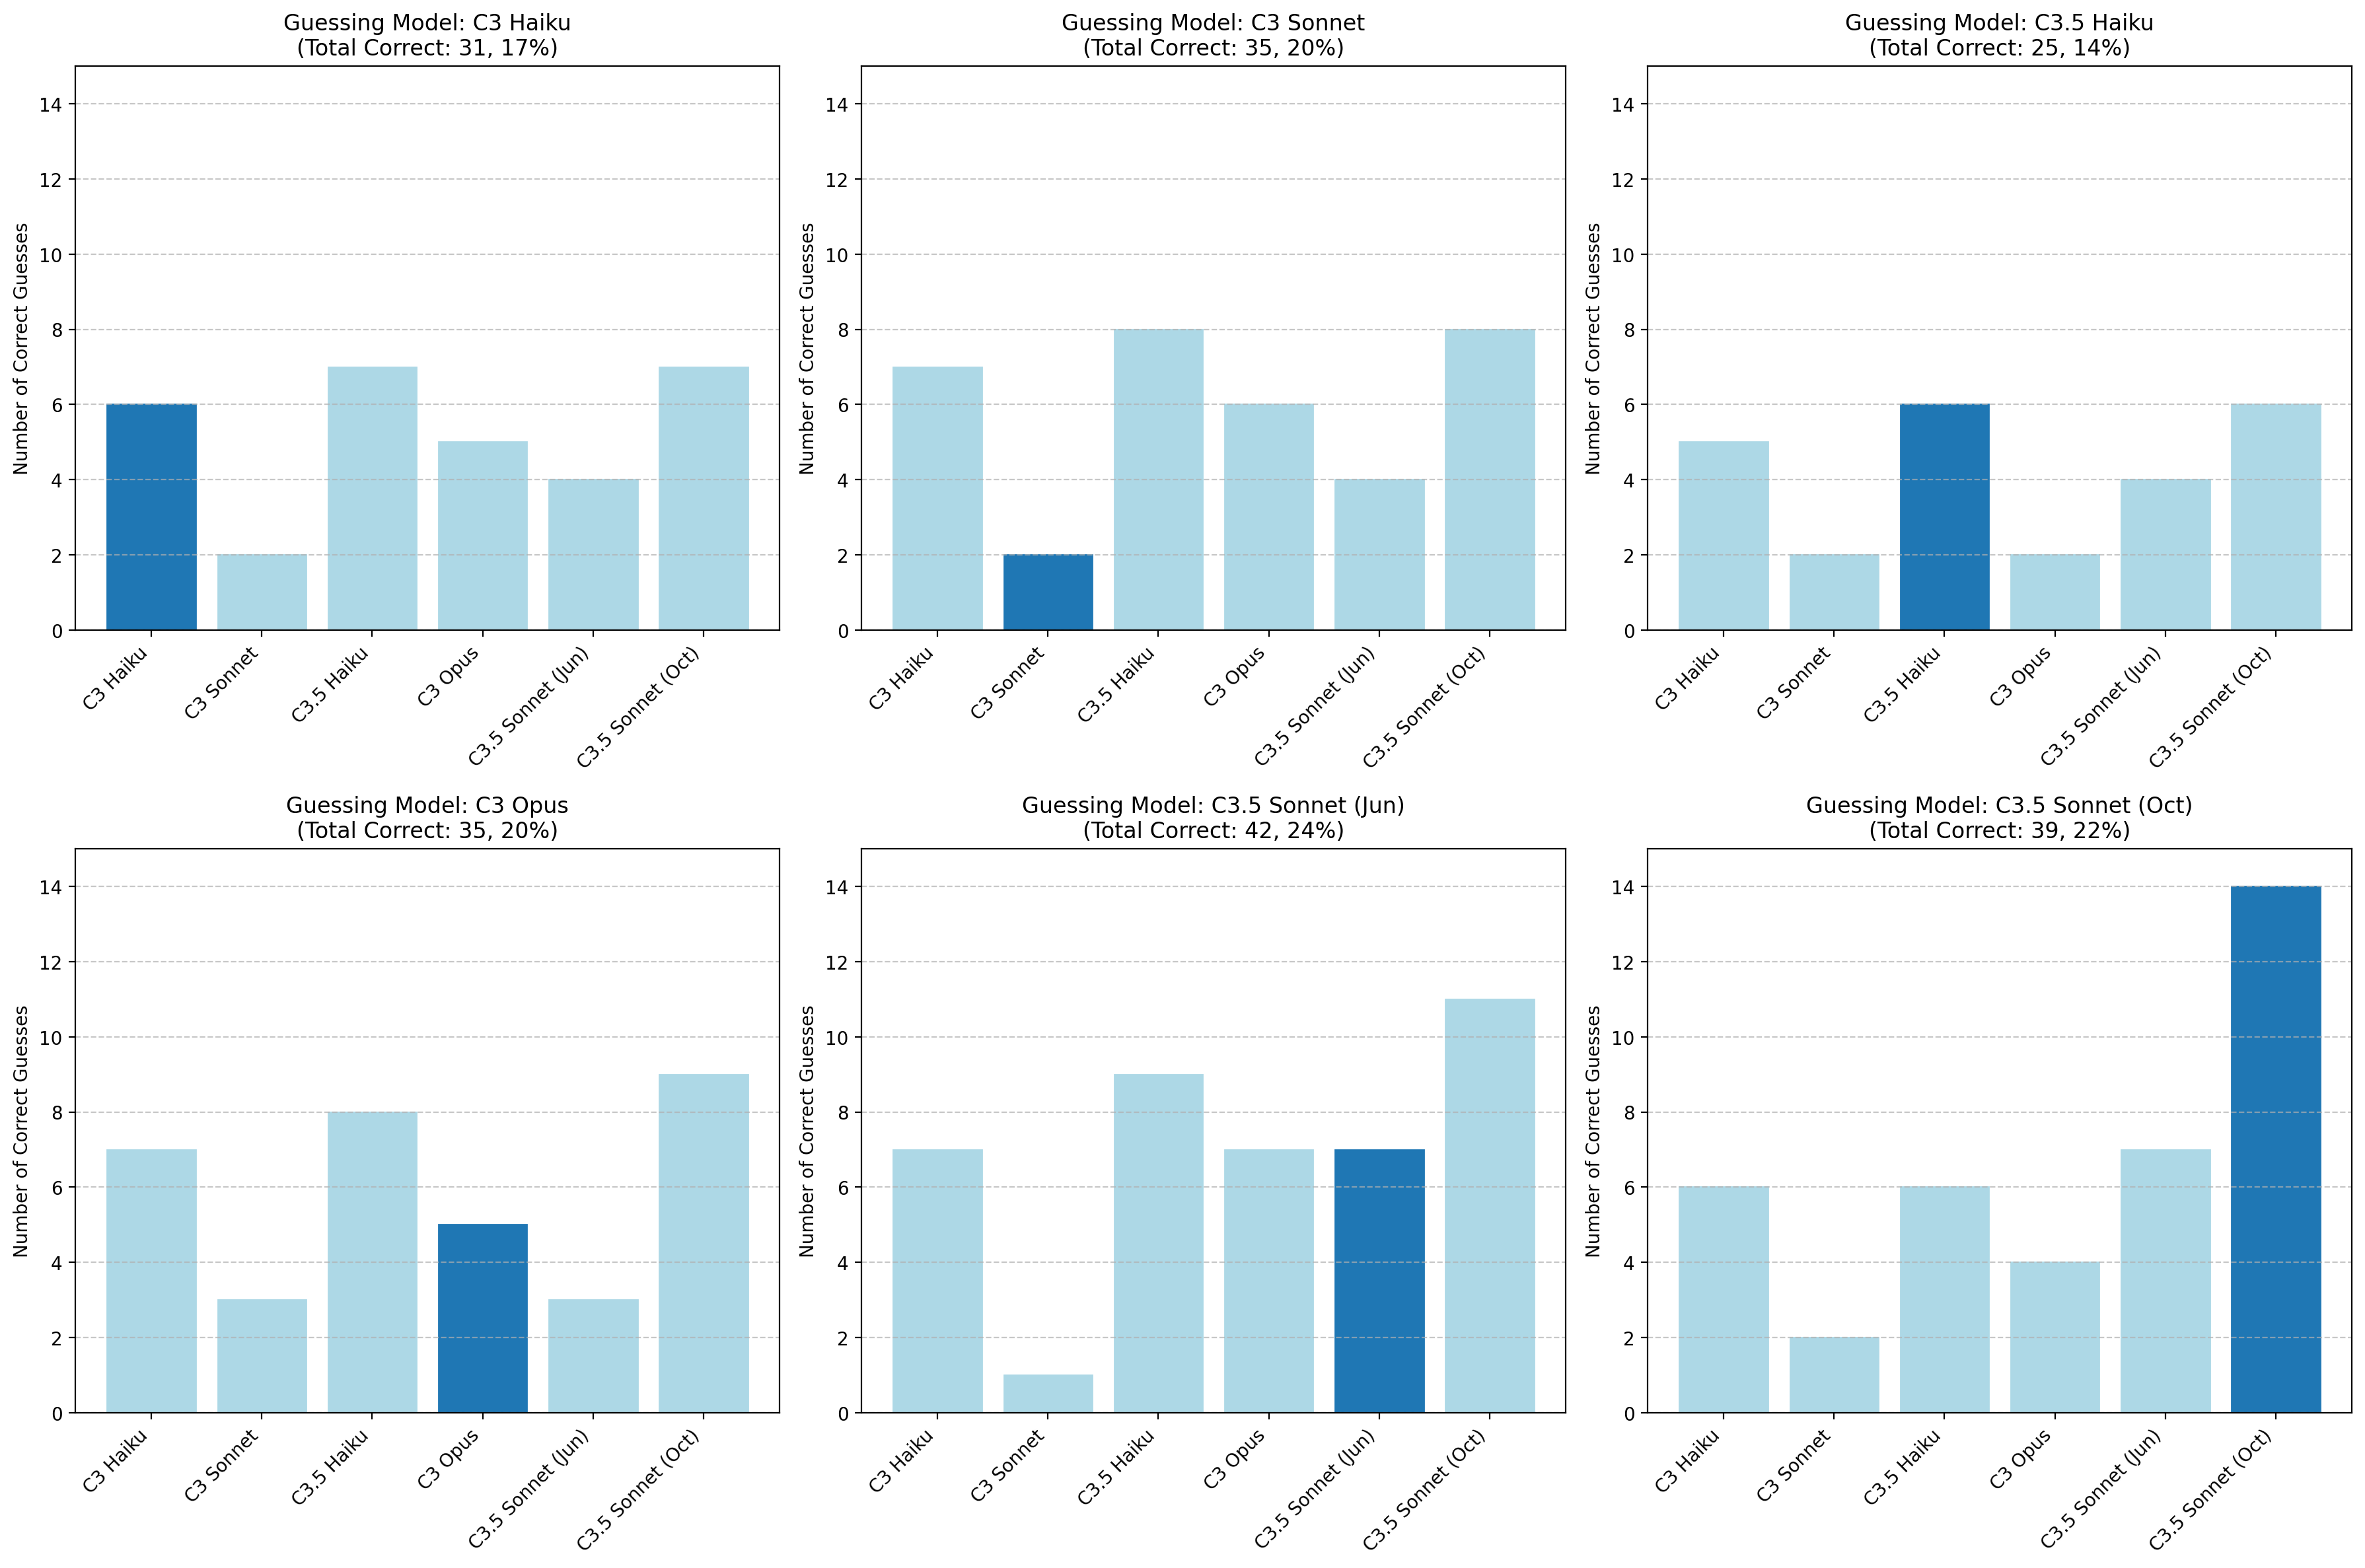

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

data = json.load(open('../data/star_chameleon_results.json', 'r'))['guesses']

# Set consistent model order
model_order = [
    'claude-3-haiku-20240307',
    'claude-3-sonnet-20240229', 
    'claude-3-5-haiku-20241022',
    'claude-3-opus-20240229',
    'claude-3-5-sonnet-20240620',
    'claude-3-5-sonnet-20241022'
]

# Create short names for better readability
model_short_names = {
    'claude-3-haiku-20240307': 'C3 Haiku',
    'claude-3-sonnet-20240229': 'C3 Sonnet', 
    'claude-3-5-haiku-20241022': 'C3.5 Haiku',
    'claude-3-opus-20240229': 'C3 Opus',
    'claude-3-5-sonnet-20240620': 'C3.5 Sonnet (Jun)',
    'claude-3-5-sonnet-20241022': 'C3.5 Sonnet (Oct)'
}

# Set up the figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
# fig.suptitle('Distribution of Correct Guesses by Model\nShowing which authors\' completions each model correctly identified', fontsize=10, y=0.95)

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# For each guessing model
for idx, guessing_model in enumerate(model_order):
    ax = axes_flat[idx]
    
    # Filter data for correct guesses by this model
    # A guess is correct when rank_of_correct is 1
    correct_guesses = df[
        (df['guessing_model'] == guessing_model) & 
        (df['rank_of_correct'] == 1)
    ]
    
    # Count correct guesses by original author
    author_counts = correct_guesses['original_model'].value_counts()
    
    # Ensure all models are represented (even if 0)
    for model in model_order:
        if model not in author_counts:
            author_counts[model] = 0
    
    # Reorder according to model_order
    author_counts = author_counts.reindex(model_order)
    
    # Create bar plot
    bars = ax.bar(range(len(model_order)), author_counts)
    
    # Highlight the bar corresponding to the guessing model
    for i, bar in enumerate(bars):
        if i == model_order.index(guessing_model):
            bar.set_color('#1f77b4')  # Light blue
        else:
            bar.set_color('#add8e6')  # Default matplotlib blue
    
    # Customize plot
    ax.set_xticks(range(len(model_order)))
    ax.set_xticklabels([model_short_names[m] for m in model_order], rotation=45, ha='right')
    ax.set_ylabel('Number of Correct Guesses')
    
    # Add total number of correct guesses to title
    total_correct = author_counts.sum()
    # Calculate percentage
    total_guesses = len(df[df['guessing_model'] == guessing_model])
    total_correct = len(df[
        (df['guessing_model'] == guessing_model) & 
        (df['rank_of_correct'] == 1)
    ])
    percent_correct = (total_correct / total_guesses) * 100

    # Add total count and percentage to title
    ax.set_title(f'Guessing Model: {model_short_names[guessing_model]}\n(Total Correct: {int(total_correct)}, {percent_correct:.0f}%)')
    
    # Set consistent y-axis limits across all plots
    ax.set_ylim(0, 15)
    
    # Add grid for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

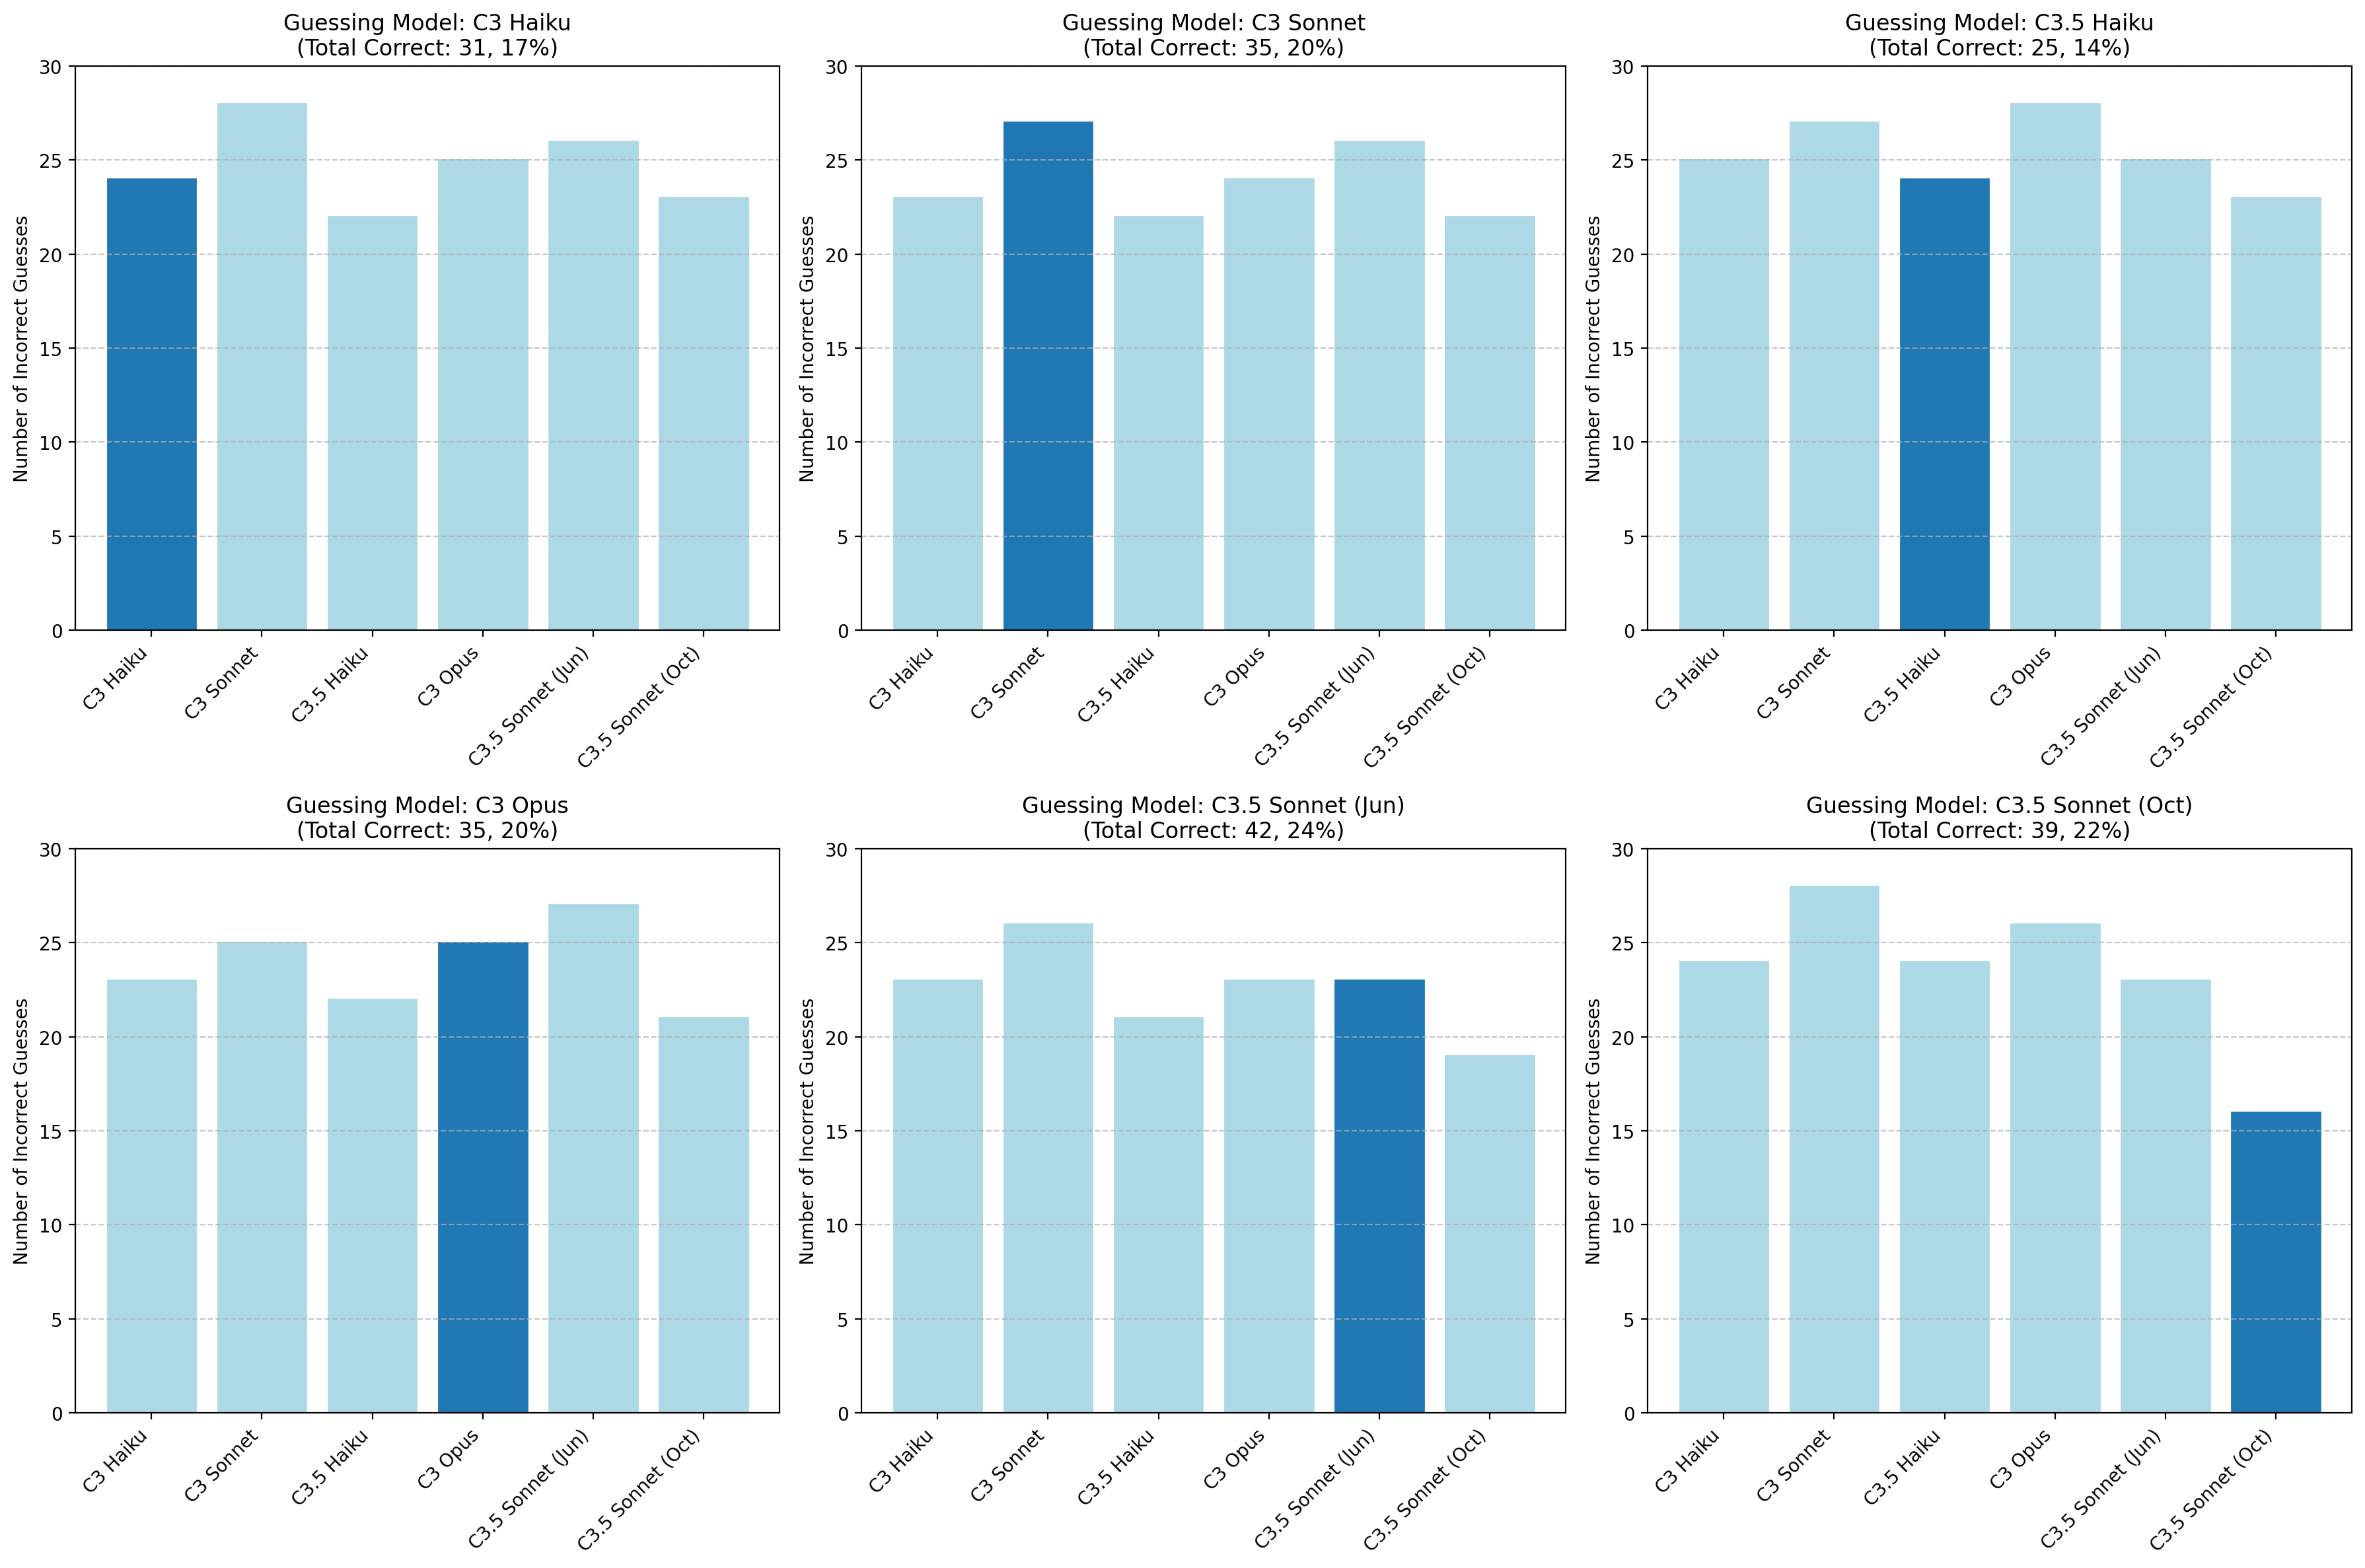

In [42]:
# Set up the figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# For each guessing model
for idx, guessing_model in enumerate(model_order):
    ax = axes_flat[idx]
    
    # Filter data for incorrect guesses by this model
    incorrect_guesses = df[
        (df['guessing_model'] == guessing_model) & 
        (df['rank_of_correct'] > 1)
    ]
    
    # Count incorrect guesses by original author
    author_counts = incorrect_guesses['original_model'].value_counts()
    
    # Ensure all models are represented (even if 0)
    for model in model_order:
        if model not in author_counts:
            author_counts[model] = 0
    
    # Reorder according to model_order
    author_counts = author_counts.reindex(model_order)
    
    # Create bar plot
    bars = ax.bar(range(len(model_order)), author_counts)
    
    # Highlight the bar corresponding to the guessing model
    for i, bar in enumerate(bars):
        if i == model_order.index(guessing_model):
            bar.set_color('#1f77b4')  # Light blue
        else:
            bar.set_color('#add8e6')  # Default matplotlib blue
    
    # Customize plot
    ax.set_xticks(range(len(model_order)))
    ax.set_xticklabels([model_short_names[m] for m in model_order], rotation=45, ha='right')
    ax.set_ylabel('Number of Incorrect Guesses')
    
    # Add total number of incorrect guesses to title
    # Add total number of correct guesses to title
    total_correct = author_counts.sum()
    # Calculate percentage
    total_guesses = len(df[df['guessing_model'] == guessing_model])
    total_correct = len(df[
        (df['guessing_model'] == guessing_model) & 
        (df['rank_of_correct'] == 1)
    ])
    percent_correct = (total_correct / total_guesses) * 100

    # Add total count and percentage to title
    ax.set_title(f'Guessing Model: {model_short_names[guessing_model]}\n(Total Correct: {int(total_correct)}, {percent_correct:.0f}%)')
    
    # Set consistent y-axis limits
    ax.set_ylim(0, 30)
    
    # Add grid for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

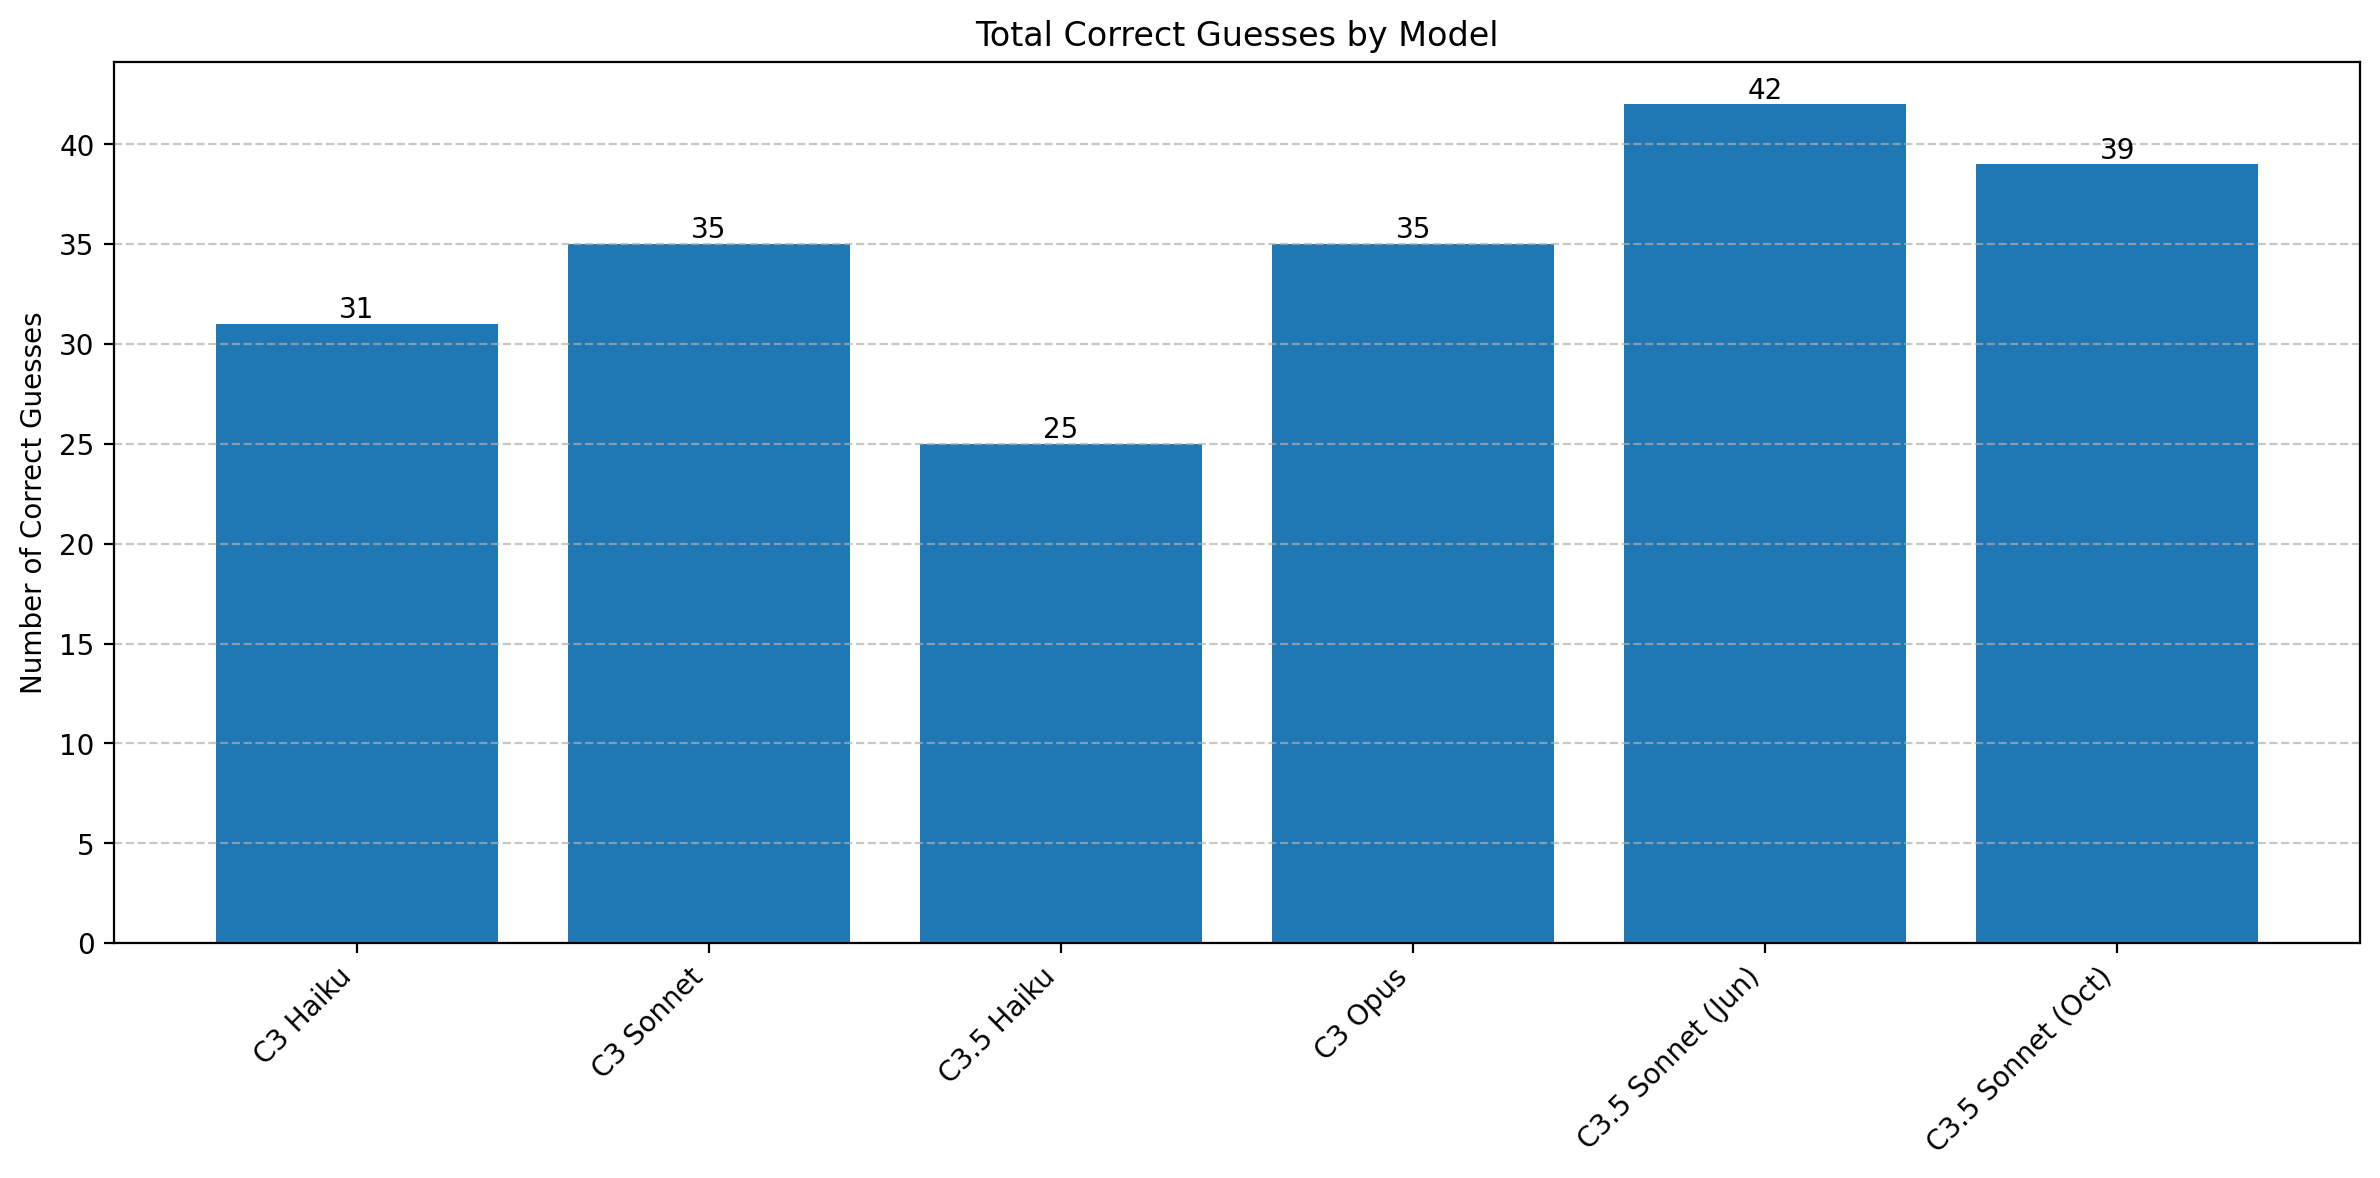

In [46]:
# Calculate correct guesses for each model
correct_guesses = {}
for model in model_order:
    total_guesses = len(df[df['guessing_model'] == model])
    total_correct = len(df[
        (df['guessing_model'] == model) & 
        (df['rank_of_correct'] == 1)
    ])
    correct_guesses[model] = total_correct
    
# Create figure
plt.figure(figsize=(12, 6))

# Create bar plot
bars = plt.bar(range(len(model_order)), [correct_guesses[m] for m in model_order])

# Customize plot
plt.xticks(range(len(model_order)), [model_short_names[m] for m in model_order], rotation=45, ha='right')
plt.ylabel('Number of Correct Guesses')
plt.title('Total Correct Guesses by Model')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# Add grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

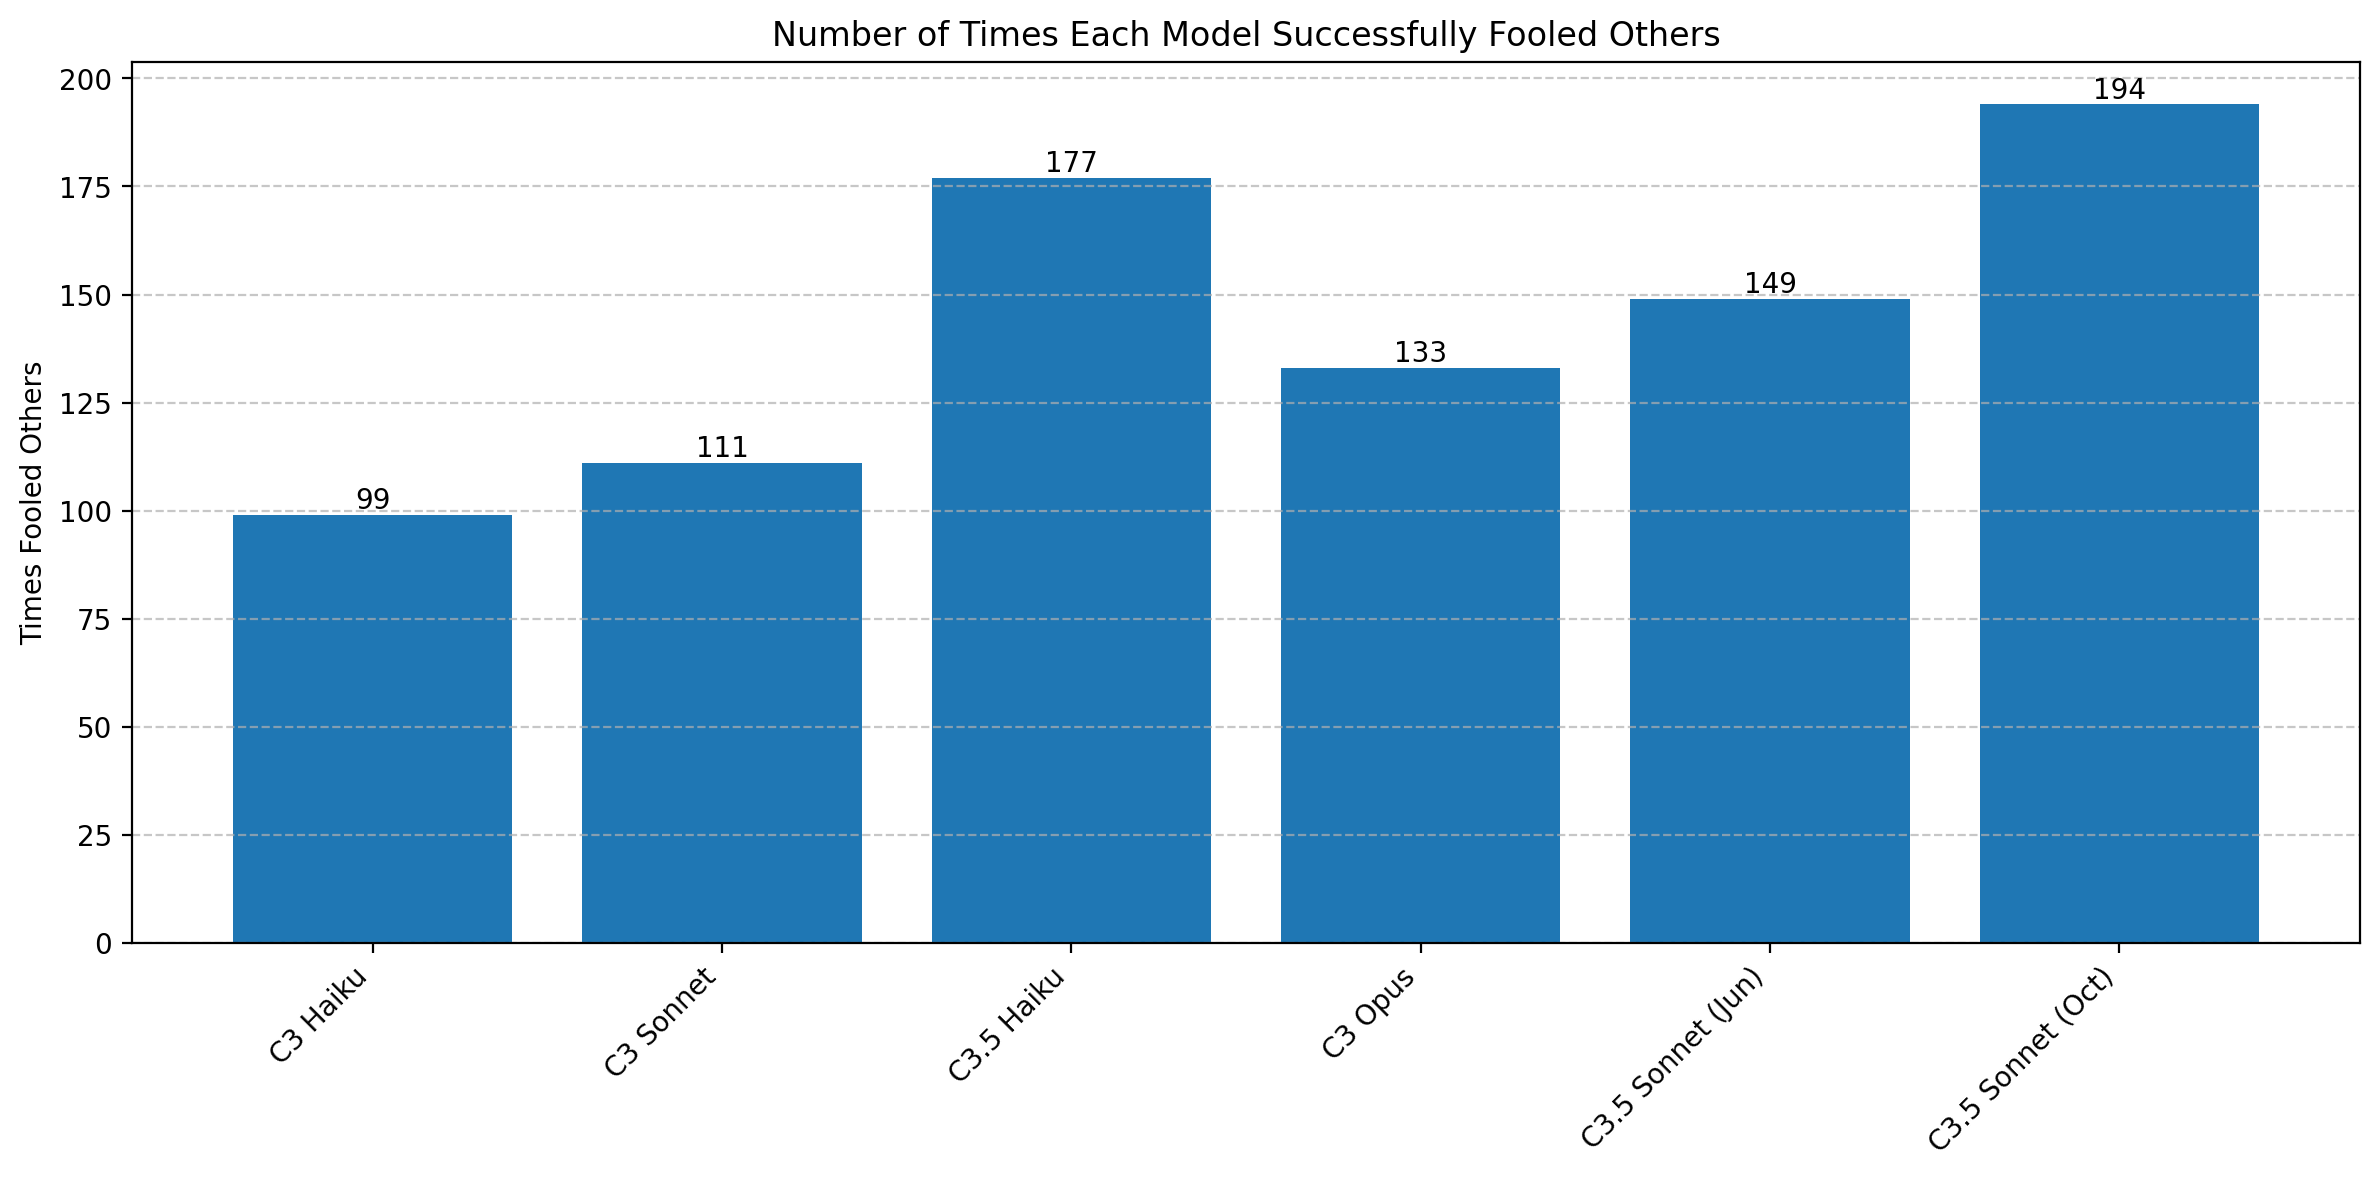

In [55]:
# Create figure
plt.figure(figsize=(12, 6))

# Create bar plot
values = [results['model_performance'][m]['times_fooled_others'] for m in model_order]
bars = plt.bar(range(len(model_order)), values)

# Customize plot
plt.xticks(range(len(model_order)), [model_short_names[m] for m in model_order], rotation=45, ha='right')
plt.ylabel('Times Fooled Others')
plt.title('Number of Times Each Model Successfully Fooled Others')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# Add grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()